# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project: Healthcare classification

## About Dataset
###Context:
This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

###Inspiration:
The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

###Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset


* **Name**: This column represents the name of the patient associated with the
healthcare record.
* **Age**: The age of the patient at the time of admission, expressed in years.
* **Gender**: Indicates the gender of the patient, either "Male" or "Female."
* **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
* **Medical Condition**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
* **Date of Admission**: The date on which the patient was admitted to the healthcare facility.
* **Doctor**: The name of the doctor responsible for the patient's care during their admission.
* **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.
* **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
* **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
* **Room Number**: The room number where the patient was accommodated during their admission.
* **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
* **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
* **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
* **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

In [1]:
#@title Download dataset
!gdown "1x6Lt9hOEkkAWar0Epz-HM8Dgjk0kUKlX&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1x6Lt9hOEkkAWar0Epz-HM8Dgjk0kUKlX&confirm=t
To: c:\Users\DELL\OneDrive\Desktop\IIT Madras Project\Project3\healthcare_dataset.csv

  0%|          | 0.00/8.40M [00:00<?, ?B/s]
  6%|▌         | 524k/8.40M [00:00<00:04, 1.96MB/s]
 12%|█▏        | 1.05M/8.40M [00:00<00:02, 3.07MB/s]
 19%|█▊        | 1.57M/8.40M [00:00<00:01, 3.57MB/s]
 25%|██▍       | 2.10M/8.40M [00:00<00:01, 4.08MB/s]
 37%|███▋      | 3.15M/8.40M [00:00<00:01, 4.73MB/s]
 50%|████▉     | 4.19M/8.40M [00:00<00:00, 5.02MB/s]
 62%|██████▏   | 5.24M/8.40M [00:01<00:00, 5.19MB/s]
 75%|███████▍  | 6.29M/8.40M [00:01<00:00, 5.24MB/s]
 87%|████████▋ | 7.34M/8.40M [00:01<00:00, 5.34MB/s]
100%|█████████▉| 8.39M/8.40M [00:01<00:00, 5.38MB/s]
100%|██████████| 8.40M/8.40M [00:01<00:00, 4.82MB/s]


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Label Encoder/One Hot Encoder
from sklearn.metrics import confusion_matrix #Confusion Matrix

## Load the csv file ( 1 Mark)

In [3]:
# read the data
df = pd.read_csv('healthcare_dataset.csv')

In [4]:
# Print the top 5 data points
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


C:\Users\DELL\AppData\Local\Temp\ipykernel_10088\341226574.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Medical Condition', inner='box', palette='Dark2')


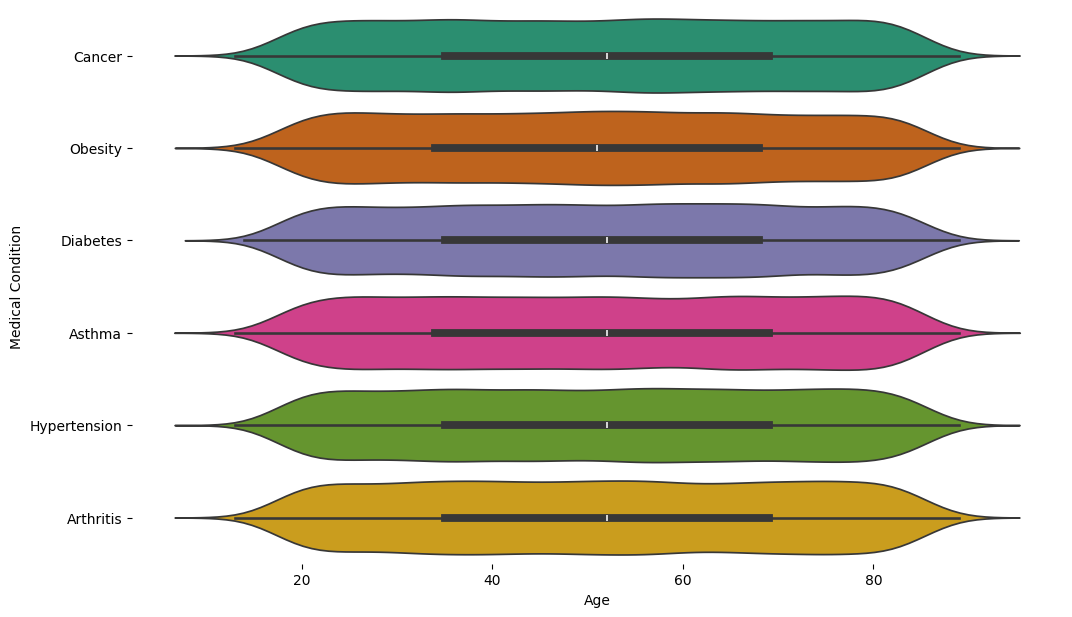

In [5]:
# @title Medical Condition vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Medical Condition'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Medical Condition', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

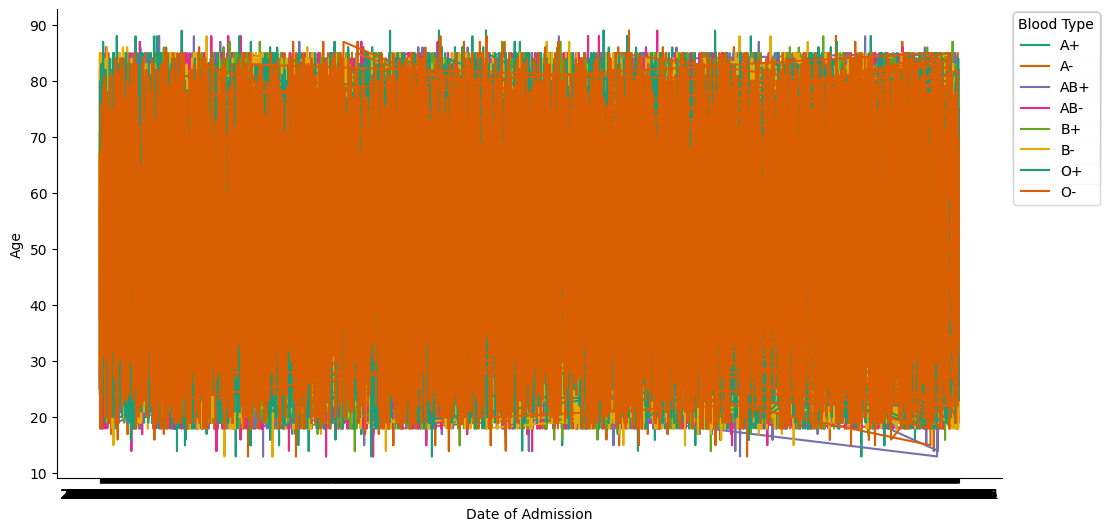

In [6]:
# @title Date of Admission vs Age

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Admission']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date of Admission', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Blood Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Blood Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Admission')
_ = plt.ylabel('Age')

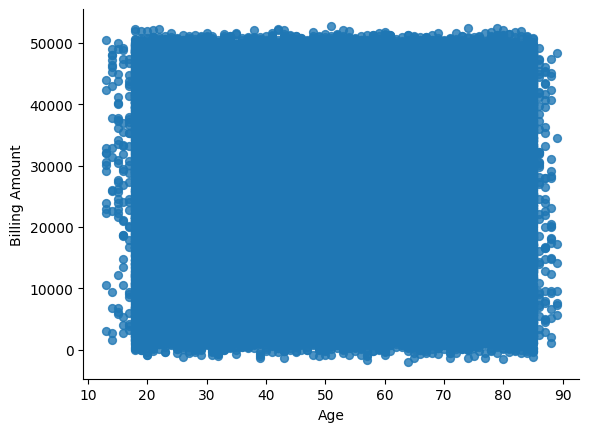

In [7]:
# @title Age vs Billing Amount

df.plot(kind='scatter', x='Age', y='Billing Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

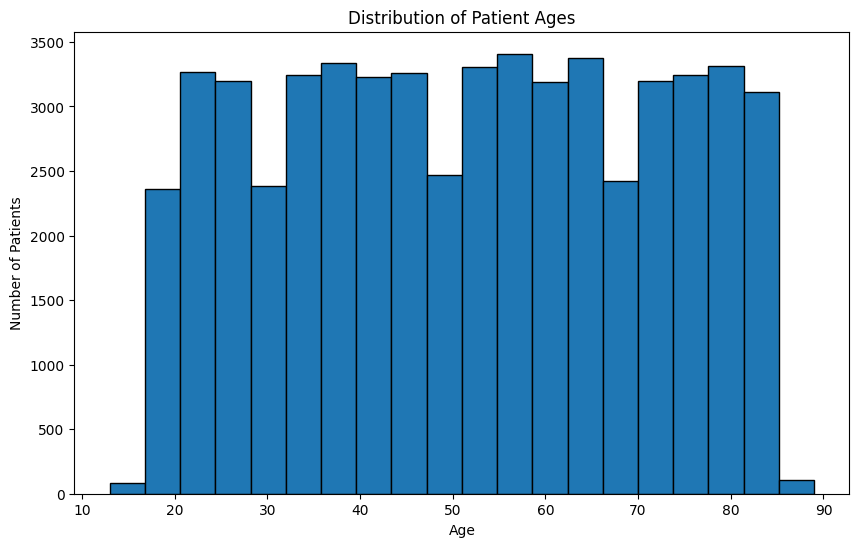

In [8]:
# @title Distribution of Patient Ages

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
_ = plt.title('Distribution of Patient Ages')

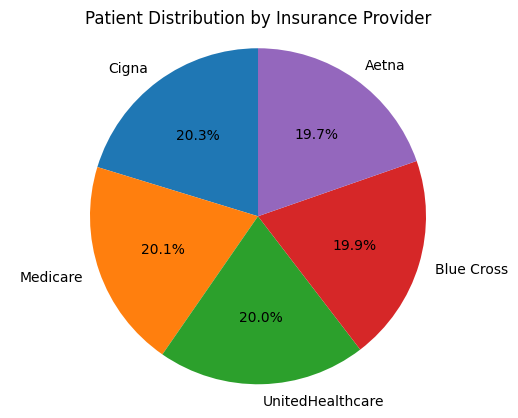

In [9]:
# @title Patient Distribution by Insurance Provider

insurance_counts = df['Insurance Provider'].value_counts()

plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Patient Distribution by Insurance Provider')
_ = plt.axis('equal')

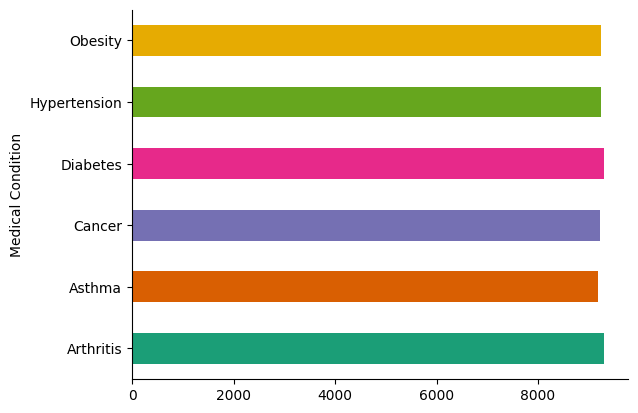

In [10]:
# @title Medical Condition
df.groupby('Medical Condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

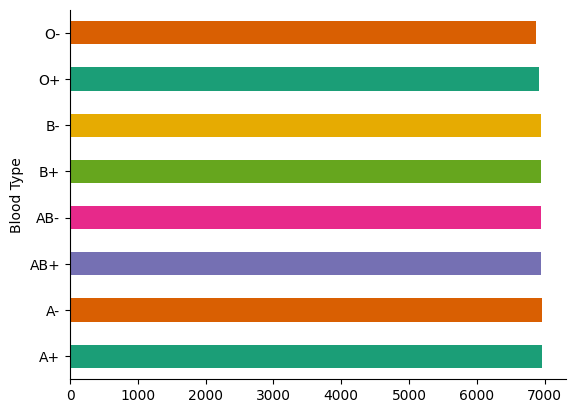

In [11]:
# @title Blood Type

df.groupby('Blood Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data Exploration ( 2 Marks)

In [12]:
# Print the type of data points
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [13]:
# Print the shape of data points
df.shape

(55500, 15)

In [14]:
# Print the missing values of each data point
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [15]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


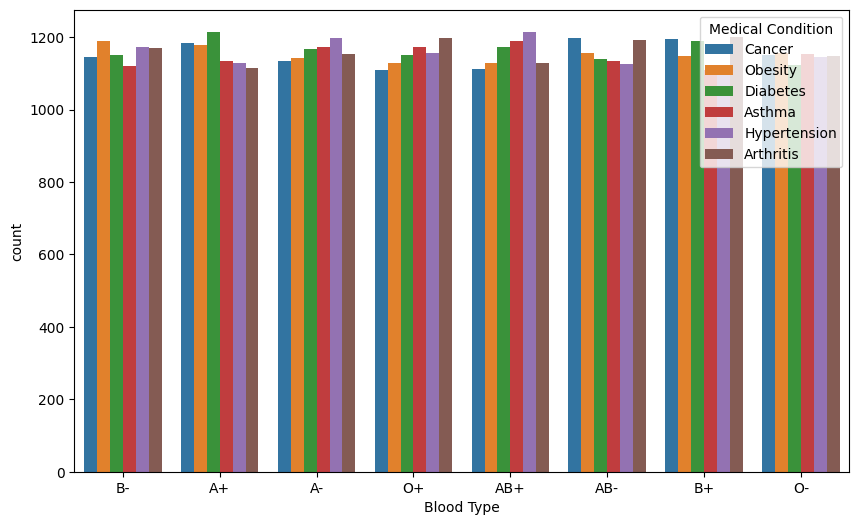

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Blood Type', hue='Medical Condition')
plt.show()

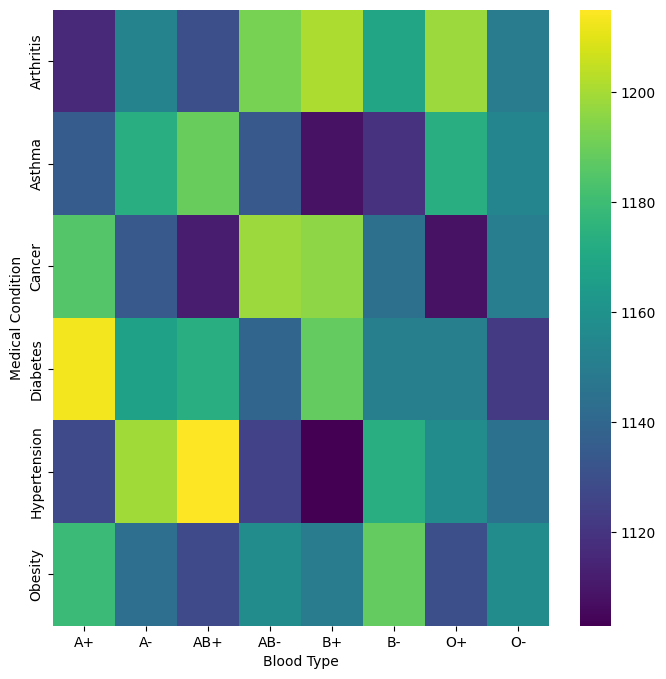

In [17]:
# @title Blood Type vs Medical Condition

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Medical Condition'].value_counts()
    for x_label, grp in df.groupby('Blood Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Blood Type')
_ = plt.ylabel('Medical Condition')

In [18]:
# Identify and Print the numerical and categorical features
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [19]:
columns = df.columns
df_num_cols = df.select_dtypes(exclude=['object']).columns
df_cat_cols = list(set(columns) - set(df_num_cols))
print(f"Numerical columns: {list(df_num_cols)}")
print(f"Categorical columns: {df_cat_cols}")

Numerical columns: ['Age', 'Billing Amount', 'Room Number']
Categorical columns: ['Hospital', 'Doctor', 'Medical Condition', 'Blood Type', 'Insurance Provider', 'Date of Admission', 'Admission Type', 'Medication', 'Discharge Date', 'Name', 'Gender', 'Test Results']


## Data Visualization ( 2 Marks)

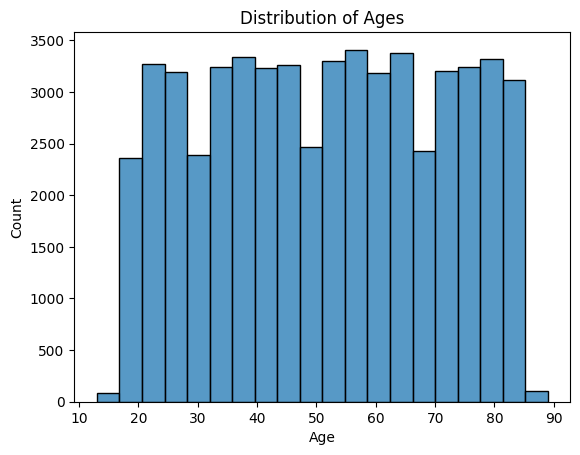

In [20]:
# Display the distribution of ages in histogram
sns.histplot(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

Target: Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


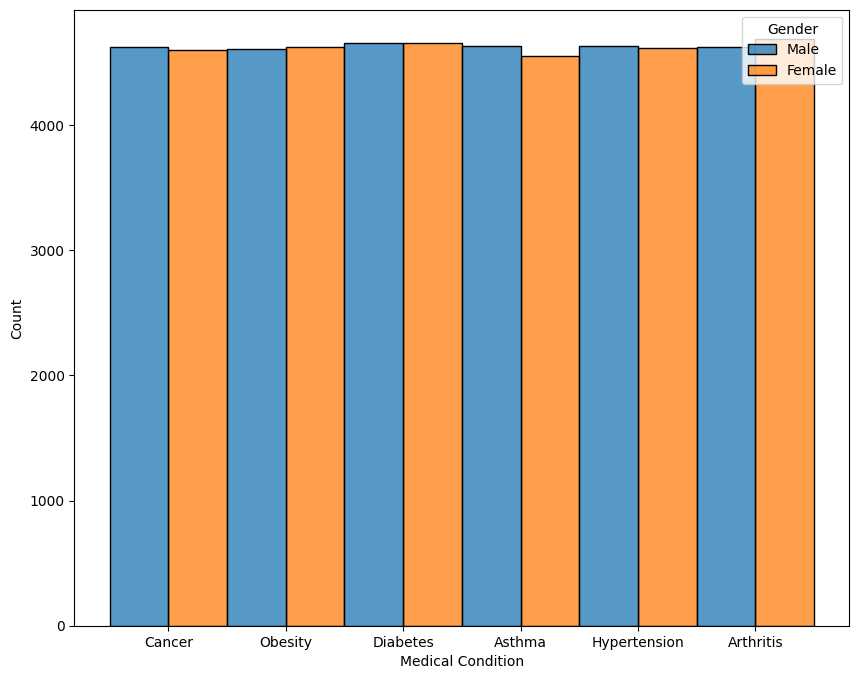

In [21]:
# Analyzing categories count of Target column

target_column_counts = df['Medical Condition'].value_counts()
print(f"Target: {target_column_counts}")

plt.figure(figsize=(10, 8))
sns.histplot(x='Medical Condition', hue='Gender', stat='count', data=df, multiple='dodge')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

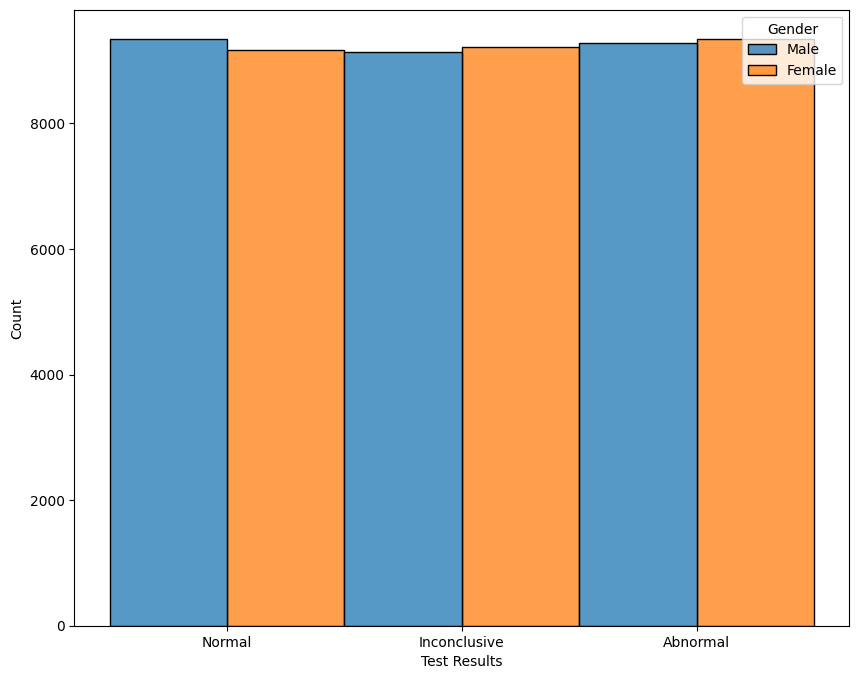

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Test Results', hue='Gender', stat='count', data=df, multiple='dodge')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

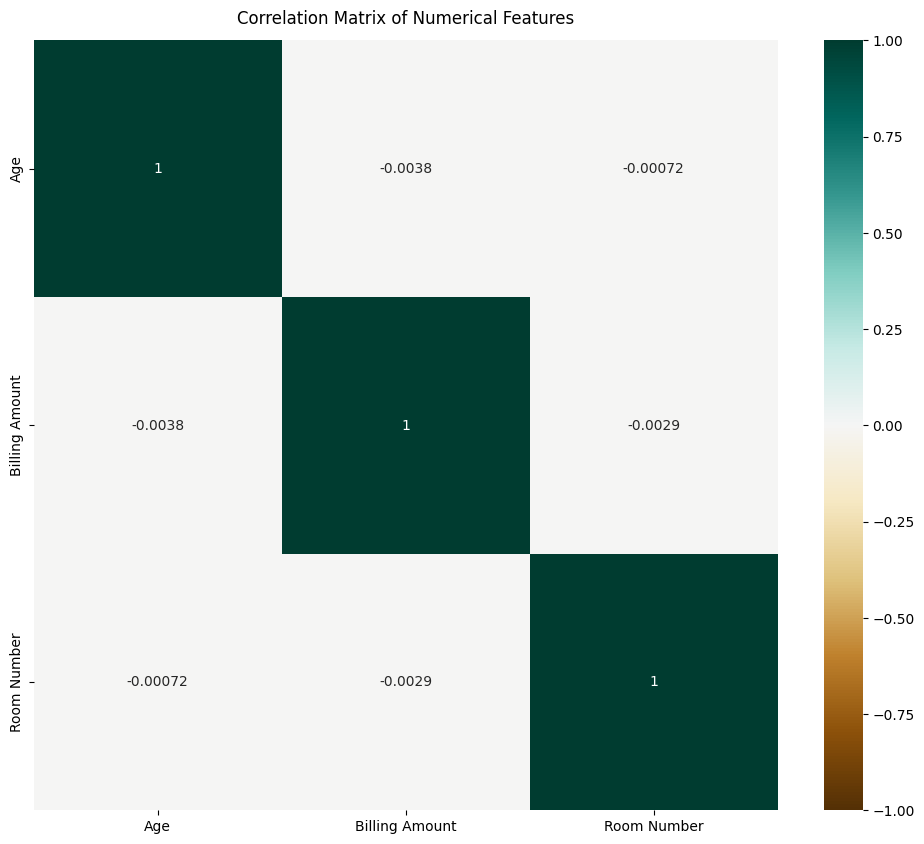

In [23]:
# YOUR CODE HERE
# Identify the numerical columns
numeric_data = df.select_dtypes(exclude=['object']).columns
# YOUR CODE HERE: Increase the size of the heatmap.
plt.figure(figsize=(12, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# YOUR CODE HERE: Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df[numeric_data].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# YOUR CODE HERE: Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Matrix of Numerical Features', fontdict={'fontsize':12}, pad=12)


## Preprocessing Data ( 2 Marks)

In [24]:
# Convert the categorical data to numerical :Label Encoding
# YOUR CODE HERE:
def encode_features(dataframe):
    # Get a list of categorical columns
    categorical_cols = dataframe.select_dtypes(include=['object']).columns

    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

    # Loop through categorical columns and apply Label Encoding
    for col in categorical_cols:
        dataframe[col] = label_encoder.fit_transform(dataframe[col])

    return dataframe

In [25]:
# Apply One Hot Encoding on 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication'
# YOUR CODE HERE:
def apply_one_hot_encoding(dataframe):
    # Get a list of columns to be One-Hot Encoded
    columns_to_encode = ['Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

    # Apply One-Hot Encoding using get_dummies
    encoded_data = pd.get_dummies(dataframe, columns=columns_to_encode)

    # Return the modified dataframe
    return encoded_data

df = pd.read_csv('healthcare_dataset.csv')

df = apply_one_hot_encoding(df)

df.head()

df = encode_features(df)

df.head()

,Name,Age,Gender,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Discharge Date,...,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,3068,30,1,1729,26612,29933,1,18856.281306,328,1730,...,False,False,False,False,True,False,False,False,True,False
1,15211,62,1,104,33648,16012,3,33643.327287,265,109,...,False,True,False,True,False,False,True,False,False,False
2,6476,76,0,1233,37828,5473,0,27955.096079,205,1247,...,False,True,False,True,False,True,False,False,False,False
3,26935,28,0,560,22511,12317,3,37909.782410,450,589,...,False,False,True,False,False,False,True,False,False,False
4,26241,43,0,1230,21259,33598,0,14238.317814,458,1249,...,False,False,False,False,True,False,False,False,False,True


In [26]:
# Identify and Drop the columns which are not useful for prediction of health
columns_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Room Number', 'Discharge Date']
# These are the features deemed potentially less relevant for health prediction

df = df.drop(columns=columns_to_drop) # Removing the identified columns using the drop function

df.head()

,Age,Gender,Insurance Provider,Billing Amount,Test Results,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,1,1,18856.281306,2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,62,1,3,33643.327287,1,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
2,76,0,0,27955.096079,2,False,True,False,False,False,...,False,True,False,True,False,True,False,False,False,False
3,28,0,3,37909.782410,0,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,43,0,0,14238.317814,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [27]:
df.columns

Index(['Age', 'Gender', 'Insurance Provider', 'Billing Amount', 'Test Results',
       'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-',
       'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Medical Condition_Arthritis', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Admission Type_Elective', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Medication_Aspirin', 'Medication_Ibuprofen',
       'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'],
      dtype='object')

## Train/Test split dataset ( 1 Mark)

In [28]:
# YOUR CODE HERE : Create X and y data

X = df.drop('Test Results', axis=1)  # Select all columns except 'Test Results' for features
y = df['Test Results']            # Select 'Test Results' as the target variable

# YOUR CODE HERE : Split the Data using sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training ( 2 Marks)

* Train you model on any 3 algorithms and predict the test data
* Confusion matrix
* Classification report

In [29]:
"""
Train your model on any 3 algorithms and predict the test data
Confusion matrix
Classification report
"""
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 1. Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)

print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gnb_predictions))
print("Classification Report:\n", classification_report(y_test, gnb_predictions))

# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# 4. Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# # 5. Support Vector Classifier
# svc_model = SVC()
# svc_model.fit(X_train, y_train)
# svc_predictions = svc_model.predict(X_test)

# print("\nSupport Vector Classifier:")
# print("Accuracy:", accuracy_score(y_test, svc_predictions))
# print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))
# print("Classification Report:\n", classification_report(y_test, svc_predictions))

Gaussian Naive Bayes:
Accuracy: 0.34153153153153154
Confusion Matrix:
 [[1624  932 1198]
 [1539  950 1128]
 [1584  928 1217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.43      0.38      3754
           1       0.34      0.26      0.30      3617
           2       0.34      0.33      0.33      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100


Decision Tree Classifier:
Accuracy: 0.4043243243243243
Confusion Matrix:
 [[1472 1111 1171]
 [1022 1476 1119]
 [1120 1069 1540]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.39      0.40      3754
           1       0.40      0.41      0.41      3617
           2       0.40      0.41      0.41      3729

    accuracy                           0.40     11100
   macro avg       0.40      0.40      0.40

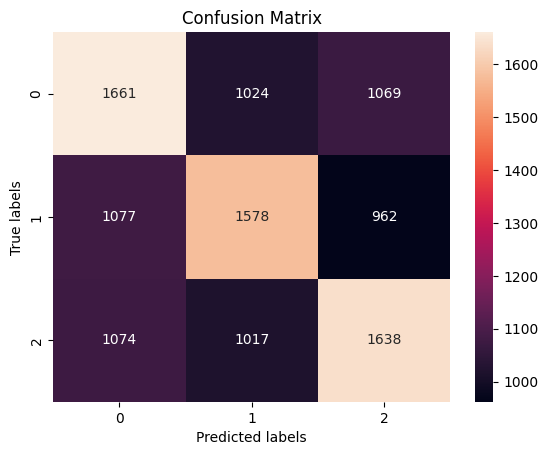

In [30]:
# YOUR CODE HERE: To visualise the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Report Your Observations